# Cosmetics Dataset - Dimensionality Reduction Using t-SNE

## Introduction

Cosmetics dataset consist of the cosmetic products which belongs to different Brands used for different purposes (Moisuriser, Cleanset, face pack etc) suitable for different skin types (dry, normal, oily etc) along with the chemical ingredients.

Its difficult for a layman to go through the chemical ingredients of the products to understand which other similar product would suite in a way that it will not lead to any unforeseen skin conditions.

Aim is to identify similar products. The dataset is not having a target variable and hence its a clustering problem.

## Loading Dataset

In [167]:
# Import libraries
import pandas as pd
import numpy as np


In [168]:
# Load the data
df = pd.read_csv("/content/cosmetics_.csv",on_bad_lines='skip')

In [169]:
#Check first five rows of the dataset
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [170]:
#Know more about the datase - information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


***INFERENCE***:

Total 1472 rows with NO null values as you can see from the Non-Null Count.

In [171]:
#Gives statistical desciptions of columns which are only numerical
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


**INFERENCE**:

**Price**: There are products with Price range 3 to 370

**Rank**: Products ranking rang 0 to 5

**Combination**: Skintype 0 if NO and 1 if Yes

**Dry**: Skintype 0 if NO and 1 if Yes

**Normal**: Skintype 0 if NO and 1 if Yes

**Oily**: Skintype 0 if NO and 1 if Yes

**Sensitive**: Skintype 0 if NO and 1 if Yes

The above 5 columns represent skintype and if the particular product is for that skintype of not.

From the 'mean' its understood that this list has products that satisfies Combination skintype the more, then Normal skintype and then Dry, Oily and Sensitive.

Combination > Normal > Dry > Oily > Sensitive.

In [172]:
#Gives statistical desciptions of columns which has the mentioned datatype
df.describe(include='object')

,Label,Brand,Name,Ingredients
count,1472,1472,1472,1472
unique,6,116,1472,1334
top,Moisturizer,CLINIQUE,Crème de la Mer,No Info
freq,298,79,1,23


INFERENCE:

**Label**: There are 6 different product categories of which Moisture category is having more products in the dataset

**Brand**: There are 116 differed Brands of which the brand CLINIQUE is having the most products in the dataset.

**Ingredients**: Is having the coma seperated values of all the chemical combination of the particular product. **There are 23 products which lack this information.**

In [173]:
#Products with No Ingredient details does not add value to our problem statement
#Lets check them and wont considered henceforth
df[df['Ingredients']=='No Info']

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
166,Moisturizer,LANCÔME,ABSOLUE PREMIUM ßx – Absolute Replenishing Cre...,175,4.5,No Info,0,0,0,0,0
235,Moisturizer,BAREMINERALS,Prime Time BB Tinted Primer Broad Spectrum SP...,27,4.1,No Info,0,0,0,0,0
266,Moisturizer,SHISEIDO,Benefiance NutriPerfect Night Cream,94,4.7,No Info,0,0,0,0,0
288,Moisturizer,LANCÔME,ABSOLUE PREMIUM ßx - Absolute Replenishing Lot...,185,4.1,No Info,0,0,0,0,0
313,Cleanser,SHISEIDO,Facial Cotton,10,4.9,No Info,0,0,0,0,0
346,Cleanser,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes - Coconut Water,7,4.7,No Info,0,0,0,0,0
406,Cleanser,SEPHORA COLLECTION,Cleansing Wipes - Watermelon - Hydrating,7,4.7,No Info,0,0,0,0,0
412,Cleanser,SEPHORA COLLECTION,Cleansing Wipes - Rose - Moisturizing,7,4.6,No Info,0,0,0,0,0
419,Cleanser,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes - Green Tea,7,4.6,No Info,0,0,0,0,0
426,Cleanser,SEPHORA COLLECTION,Exfoliating Wipes - Charcoal - Detoxifying,7,4.2,No Info,0,0,0,0,0


In [174]:
df_valid_ingredients = df[df['Ingredients']!='No Info']

In [175]:
#1472 - 23 = 1449
df_valid_ingredients.shape

(1449, 11)

In [176]:
#avoiding products without valid ingredient list
df_valid_ingredients = df_valid_ingredients[df_valid_ingredients['Ingredients'].str.contains(',')]

In [177]:
df_valid_ingredients.shape

(1275, 11)

In [178]:
#Get the count of products againt the category of products - Category wise product count
df_valid_ingredients['Label'].value_counts()

,count
Label,
Moisturizer,252
Cleanser,242
Face Mask,237
Treatment,219
Eye cream,181
Sun protect,144


In [179]:
#Get the count of products againt the Brand of products - Brand wise product count
df_valid_ingredients['Brand'].value_counts()

,count
Brand,
CLINIQUE,74
ORIGINS,49
SHISEIDO,47
MURAD,46
SEPHORA COLLECTION,45
...,...
EDIBLE BEAUTY,1
NURSE JAMIE,1
CLARISONIC,1


In [180]:
#Check for duplicates
df_valid_ingredients[df_valid_ingredients.duplicated()]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive


**INFERENCE**:

No duplicates found in the dataset.

## Working for One Category and One Skin Type

Lets check which SkinType has more products for Moisturizer Category.

Selected Moisturizer Category as its having the heighest number of products in this dataset.

In [181]:
df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Combination']==1)].shape[0]

177

In [182]:
df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Dry']==1)].shape[0]

163

In [183]:
df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Normal']==1)].shape[0]

179

In [184]:
df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Oily']==1)].shape[0]

155

In [185]:
df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Sensitive']==1)].shape[0]

143

Selecting Normal SkinType as its having the most number of products in the Moisturizer Category (179 products).

## Moisturizers for Normal Skin Type

In [186]:
#New dataframe with Moistures that work for Normal Skin Type
moisturizer_normal = df_valid_ingredients[(df_valid_ingredients['Label']=='Moisturizer')&(df_valid_ingredients['Normal']==1)]

In [187]:
#Ignoring the Index from original dataset and getting new Index starting from 0
moisturizer_normal = moisturizer_normal.reset_index(drop=True)

In [188]:
moisturizer_normal.shape

(179, 11)

In [189]:
moisturizer_normal.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## Splitting the Ingredients - Tokenizing the Ingredients

Aim is to identify products with similar ingredients. For that we need to seperate the ingredients which are currently single value of a column and is comma seperated.

In [190]:
# Initialize dictionary, list, and initial index
ingredient_idx = {}
corpus = []
idx = 0

# For loop for tokenization
for i in range(len(moisturizer_normal)):
    #Ingredients of one product at a time
    ingredients = moisturizer_normal['Ingredients'][i]
    #Keeping ingredients information in lower case as a standard
    ingredients_lower = ingredients.lower()
    #Seperating the ingredients using comma and keeping them as a list
    tokens = ingredients_lower.split(', ')
    #Tokenized Ingredients are appended to a list, corpus is a list of lists
    #that represent the cosmetics in the same order as in moisturizer_normal dataframe
    corpus.append(tokens)
    #Indexing the Ingredients
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1



In [191]:
#Function to check if a value exist as the key of a dictionary
def checkKey(dic, key):

    if key in dic:
        print("Present, ", end =" ")
        print("value =", dic[key])
    else:
        print("Not present")

In [192]:
checkKey(ingredient_idx, 'mineral oil')

Present,  value = 1


In [193]:
checkKey(ingredient_idx, 'algae (seaweed) extract')

Present,  value = 0


In [194]:
len(ingredient_idx)

2295

Inference:

There are 2295 Ingredients identified of the Moisutures that suites Normal Skin Type.

## Cosmetics to Tokenized Ingredient Mapping (DTM - Document Term Mapping)

Now we have all the ingredients seperated(tokenized) and indexed. They have to be now mapped to the cosmetics. This is essentially creating a new dataset which consist of rows having products along with each ingredients as seperate features.

The above aim can be achieved by creating a Matrix which has rows equivalent to the number of cosmentics and columns equivalent to the number of ingredients tokenized.

In [195]:
# Get the number of cosmetics items and ingredient tokens
M = len(corpus)
N = len(ingredient_idx)

# Initialize a matrix of zeros
A = np.zeros([M,N])

Now we need an encoding function which will map either 0 or 1 for the absence/presence of an ingredient in the cosmetic.

In [196]:
# Define the oh_encoder function
def ingredient_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

Now using the encoder function on the corpus list we can create a matrix which has only the features of the cosmetic product in either 0 or 1 fashion.

In [197]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = ingredient_encoder(tokens)
    i+=1

In [198]:
A.shape

(179, 2295)

The ingredient information of 179 products  is now one hot encoded as a document-term matrix.

Document is the cosmetic and terms are its ingredients.

# Dimensionality Reduction using tSNE

The 2295 features of the 179 products need to be reduced so that visualization is possible.

Following tSNE as this dataset is not a labelled one and has huge feature list.

In [199]:
from sklearn.manifold import TSNE
#bioinfokit for TSNE visualization
from bioinfokit.visuz import cluster
#bokeh Visualization for tSNE
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()


In [200]:
%%capture
!pip install bioinfokit

In [ ]:
#TSNE(n_components: int = 2, *,
#     perplexity: float = 30,
#     early_exaggeration: float = 12,
#     learning_rate: str = "auto",
#     n_iter: int = 1000,
#     n_iter_without_progress: int = 300,
#     min_grad_norm: float = 1e-7,
#     metric: str = "euclidean",
#     metric_params: Any | None = None,
#     init: str = "pca",
#     verbose: int = 0,
#     random_state: Any | None = None,
#     method: str = "barnes_hut",
#     angle: float = 0.5,
#     n_jobs: Any | None = None)

## Perplexity - 30

In [201]:
# Dimension reduction with t-SNE
model = TSNE(n_components=2,learning_rate="auto",n_iter=1000,random_state=42)
#model = TSNE(n_components=2)
#this option selects learning rate as auto and the kl_divergence increases
#hence decided to keep learning rate as 200
tsne_features = model.fit_transform(A)


In [202]:
# Make X, Y columns
moisturizer_normal['X'] = tsne_features[:,0]
moisturizer_normal['Y'] = tsne_features[:,1]

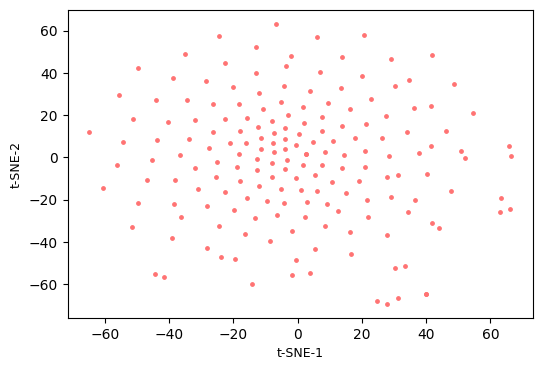

In [203]:
#tSNE Visualization using bioinfokit
cluster.tsneplot(score=tsne_features, colordot='#FF7373', show=True)

#tsneplot(score=None, axlabelfontsize=9, axlabelfontname="Arial", figtype='png', r=300, show=False,
#             markerdot="o", dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best',
#             figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)

In [204]:
#bokeh visualization for tSNE

# Make a source and a scatter plot
source = ColumnDataSource(moisturizer_normal)
plot = figure(x_axis_label = "T-SNE 1",
              y_axis_label = "T-SNE 2",
              width = 500, height = 400)
plot.circle(x = "X",
    y = "Y",
    source = source,
    size = 3, color = '#FF7373', alpha = .8)

# Create a HoverTool object
hover = HoverTool(tooltips = [('Item','@Name'),
                              ('Brand','@Brand'),
                              ('Price','$@Price'),
                              ('Rank','@Rank')])
plot.add_tools(hover)

# Plot the map
show(plot)

In [205]:
tsne_features

array([[ 33.442158  , -51.22987   ],
       [  2.493144  ,   1.5783968 ],
       [ -6.6324015 ,  63.22697   ],
       [ 24.601961  , -68.0014    ],
       [ 63.094402  , -25.615723  ],
       [  7.4599442 ,  12.556887  ],
       [ 21.028452  ,   3.1198452 ],
       [  2.9608161 , -21.136414  ],
       [ -8.11124   ,  17.230562  ],
       [ 17.850864  ,   9.073052  ],
       [-10.684782  ,  22.735981  ],
       [-26.292648  ,  25.438366  ],
       [ 28.933994  ,  46.608917  ],
       [ -4.223964  , -21.395372  ],
       [ -3.472986  ,  43.009922  ],
       [-14.320453  , -59.998173  ],
       [ 30.42446   , -52.179207  ],
       [ 41.686886  ,  48.2498    ],
       [ 47.735603  , -15.728602  ],
       [-38.67781   ,  37.43094   ],
       [ 31.1435    ,  -8.531601  ],
       [ -3.2741659 ,  -1.0641091 ],
       [ 63.461456  , -19.110966  ],
       [ 36.637363  , -20.12497   ],
       [ 43.918278  , -33.556004  ],
       [  2.493144  ,   1.5783968 ],
       [-19.573526  , -48.18705   ],
 

In [206]:
model.get_feature_names_out()

array(['tsne0', 'tsne1'], dtype=object)

In [207]:
model.get_params(deep=True)

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 42,
 'verbose': 0}

### kl_divergence

In [208]:
model.kl_divergence_

1.218057632446289

**At perplexity 30, we get KL Divergence score of 1.218057632446289 with default values for niter and learning_rate.**

KL Divergence was 1.37237429618835 for learning_rate=200 and default niter of 1000

KL Divergence was 0.9495609998703 for default learning rate and 5000 iterations

Since we are getting better KL divergence with default settings at another perplexity value (40, which is still in the range of 5 to 50), ignoring the need for increase in iterations to 5000.

## Perplexity - 5

In [209]:
# Dimension reduction with t-SNE
model_p = TSNE(n_components=2, perplexity=5, learning_rate="auto", n_iter=1000, random_state=42)
tsne_features_p = model_p.fit_transform(A)

moisturizer_normal_p = moisturizer_normal.copy()
# Make X, Y columns
moisturizer_normal_p['X'] = tsne_features_p[:,0]
moisturizer_normal_p['Y'] = tsne_features_p[:,1]

### kl_divergence

In [210]:
model_p.kl_divergence_

2.0016520023345947

In [211]:
model_p.get_params(deep=True)

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 5,
 'random_state': 42,
 'verbose': 0}

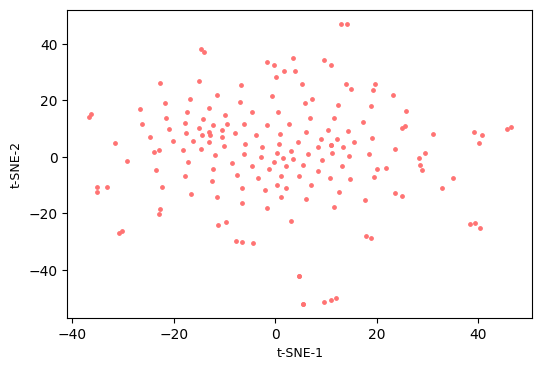

In [212]:
cluster.tsneplot(score=tsne_features_p, colordot='#FF7373', show=True)

#tsneplot(score=None, axlabelfontsize=9, axlabelfontname="Arial", figtype='png', r=300, show=False,
#             markerdot="o", dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best',
#             figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)

In [213]:
# Make a source and a scatter plot
source = ColumnDataSource(moisturizer_normal_p)
plot = figure(x_axis_label = "T-SNE 1",
              y_axis_label = "T-SNE 2",
              width = 500, height = 400)
plot.circle(x = "X",
    y = "Y",
    source = source,
    size = 3, color = '#FF7373', alpha = .8)

# Create a HoverTool object
hover = HoverTool(tooltips = [('Item','@Name'),
                              ('Brand','@Brand'),
                              ('Price','$@Price'),
                              ('Rank','@Rank')])
plot.add_tools(hover)

# Plot the map
show(plot)

KL divergence score at:
**perplexity = 5 and default parameters is 2.001652002**

It increases to 2.057918549 when learning iteration is set to 200.


## Perplexity - 50

In [214]:
# Dimension reduction with t-SNE
model_p = TSNE(n_components=2, perplexity=50, learning_rate="auto", n_iter=1000 ,random_state=42)
tsne_features_p = model_p.fit_transform(A)

moisturizer_normal_p = moisturizer_normal.copy()
# Make X, Y columns
moisturizer_normal_p['X'] = tsne_features_p[:,0]
moisturizer_normal_p['Y'] = tsne_features_p[:,1]

### kl_divergence

In [215]:
model_p.kl_divergence_

0.9559838175773621

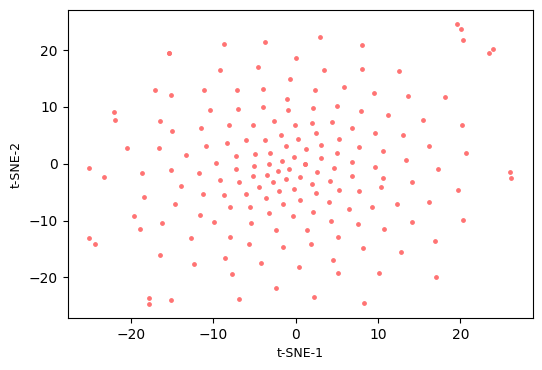

In [216]:
cluster.tsneplot(score=tsne_features_p, colordot='#FF7373', show=True)

#tsneplot(score=None, axlabelfontsize=9, axlabelfontname="Arial", figtype='png', r=300, show=False,
#             markerdot="o", dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best',
#             figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)

In [217]:
# Make a source and a scatter plot
source = ColumnDataSource(moisturizer_normal_p)
plot = figure(x_axis_label = "T-SNE 1",
              y_axis_label = "T-SNE 2",
              width = 500, height = 400)
plot.circle(x = "X",
    y = "Y",
    source = source,
    size = 5, color = '#FF7373', alpha = .8)

# Create a HoverTool object
hover = HoverTool(tooltips = [('Item','@Name'),
                              ('Brand','@Brand'),
                              ('Price','$@Price'),
                              ('Rank','@Rank')])
plot.add_tools(hover)

# Plot the map
show(plot)

**At perplexity=50, we get KL Divergence score 0.9559838176 for default values of other parameters.**

KL Divergence score becomes 1.058805108 when learning iteration is changed to 200.

Since 5 to 50 is the suggested range for perplexity values, checking for an arbitary value of 40 and then proceeding to clustering.

## Perplexity - 40

In [218]:
# Dimension reduction with t-SNE
model_p = TSNE(n_components=2, perplexity=40, learning_rate="auto", n_iter=1000 ,random_state=42)
tsne_features_p = model_p.fit_transform(A)

moisturizer_normal_p = moisturizer_normal.copy()
# Make X, Y columns
moisturizer_normal_p['X'] = tsne_features_p[:,0]
moisturizer_normal_p['Y'] = tsne_features_p[:,1]

### kl_divergence

In [219]:
model_p.kl_divergence_

0.7510694861412048

In [220]:
model_p.get_params(deep=True)

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 40,
 'random_state': 42,
 'verbose': 0}

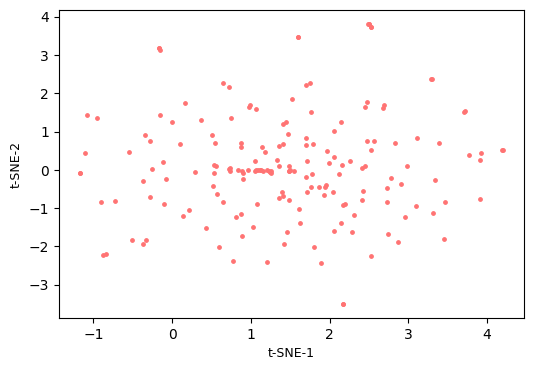

In [110]:
cluster.tsneplot(score=tsne_features_p, colordot='#FF7373', show=True)

#tsneplot(score=None, axlabelfontsize=9, axlabelfontname="Arial", figtype='png', r=300, show=False,
#             markerdot="o", dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best',
#             figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)

In [111]:
# Make a source and a scatter plot
source = ColumnDataSource(moisturizer_normal_p)
plot = figure(x_axis_label = "T-SNE 1",
              y_axis_label = "T-SNE 2",
              width = 500, height = 400)
plot.circle(x = "X",
    y = "Y",
    source = source,
    size = 3, color = '#FF7373', alpha = .8)

# Create a HoverTool object
hover = HoverTool(tooltips = [('Item','@Name'),
                              ('Brand','@Brand'),
                              ('Price','$@Price'),
                              ('Rank','@Rank')])
plot.add_tools(hover)

# Plot the map
show(plot)

**At perplexity=40, we get the best KL Divergence score of 0.7510694861412048 for default values of all other parameters.**

KL Divergence score becomes 1.162023783 when learning iteration is 200.

## INFERENCE

We have 179 data points with 2295 features. These datapoints are now reduced to 2 features using tSNE with perplexity value 40 and all other parameters with default value.

Its is while Perplexity at 40 I go the best KL Divergence score which shows the difference is comparitively minimal while ploting datapoints on heigher dimention and lower dimension.

**I have been checking with :**

**perplexity values - 5, 30, 50 and 40**

**niter values - 1000 and 5000**

**learning rates - auto and 200**



# Clustering Using KMean

In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

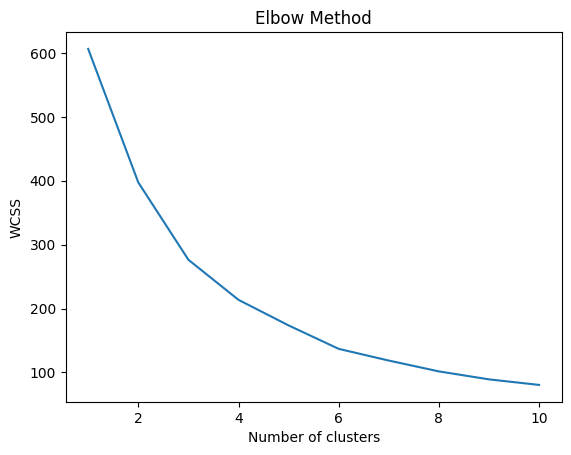

In [113]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(tsne_features_p)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Elbow - 6

In [114]:
#Build Cluster algorithm
clusters_6 = KMeans(6, random_state=42)
clusters_6.fit(tsne_features_p)
label_6 = clusters_6.predict(tsne_features_p)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [115]:
#Assign clusters to the data set
moisturizer_normal_p_cluster6 = moisturizer_normal_p.copy()
moisturizer_normal_p_cluster6['clusterid'] = clusters_6.labels_
moisturizer_normal_p_cluster6.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1.596630,3.455821,4
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1.485999,-0.026512,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1.414417,-1.926876,3
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,2.500669,3.814490,4
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-0.162808,3.187711,0


In [116]:
moisturizer_normal_p_cluster6['clusterid'].value_counts()

,count
clusterid,
1,63
3,27
5,27
2,24
0,21
4,17


In [121]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==0].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-0.162808,3.187711,0
11,Moisturizer,FARMACY,Honeymoon Glow AHA Resurfacing Night Serum wit...,58,4.6,"Water, Lactic Acid, Propanediol, Jojoba Esters...",1,1,1,1,1,-0.276099,0.740210,0
22,Moisturizer,IT COSMETICS,Your Skin But Better CC+ Cream Oil-Free Matte ...,38,3.9,"Water, Dimethicone, Butylene Glycol Dicaprylat...",1,1,1,1,0,-0.150224,3.140488,0
26,Moisturizer,TATCHA,Luminous Dewy Skin Mist,48,4.0,"Water, Glycerin, Squalane (Olive Origin), Cycl...",1,1,1,0,1,0.977226,1.650701,0
28,Moisturizer,OLEHENRIKSEN,Goodnight Glow Retin-ALT Sleeping Crème,55,4.3,"Water, Glycerin, Vitis Vinifera (Grape) Seed O...",1,1,1,1,0,-0.149868,1.421818,0


In [117]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==1].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1.485999,-0.026512,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1,1.469841,0.941063,1
8,Moisturizer,KIEHL'S SINCE 1851,Midnight Recovery Concentrate,47,4.4,Caprylic/Capric Triglyceride Dicaprylyl Carbon...,1,1,1,1,1,1.061768,-0.006060,1
10,Moisturizer,SUNDAY RILEY,Luna Sleeping Night Oil,105,4.1,"Persea Gratissima (Extra Virgin, Cold Pressed ...",1,1,1,1,1,0.728766,0.046512,1
21,Moisturizer,TATCHA,Pure One Step Camellia Cleansing Oil,48,4.5,"Cetyl Ethylhexanoate, Oryza Sativa (Rice) Bran...",1,1,1,1,1,1.330392,0.258528,1


In [118]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==2].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
15,Moisturizer,SK-II,R.N.A. POWER Face Cream,230,4.3,"Water, Glycerin, Galactomyces Ferment Filtrate...",0,1,1,0,1,3.338079,-0.279520,2
17,Moisturizer,FRESH,Black Tea Firming Overnight Mask,92,4.1,"Water, Glycerin, Butylene Glycol, Jojoba Ester...",1,1,1,0,0,2.834524,0.706891,2
20,Moisturizer,SK-II,GenOptics Aura Essence Serum,240,4.1,"Water, Galactomyces Ferment Filtrate (Pitera),...",1,1,1,1,1,3.723945,1.529928,2
27,Moisturizer,SHISEIDO,Benefiance WrinkleResist24 Night Cream,63,4.4,"Water, Cetyl Ethylhexanoate, Glycerin, Butylen...",0,1,1,0,0,3.919964,0.431744,2
52,Moisturizer,GLAMGLOW,GLOWSTARTER™ Mega Illuminating Moisturizer,49,4.0,"Water, Dimethicone, Butylene Glycol, Cetyl Ric...",1,1,1,1,0,2.984983,0.107277,2


In [120]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==3].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1.414417,-1.926876,3
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0,2.311091,-1.168243,3
7,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1,2.409434,-0.782113,3
12,Moisturizer,DRUNK ELEPHANT,The Littles™,90,4.4,"Beste™ No.9 Jelly Cleanser: Water, Sodium Laur...",1,1,1,1,0,2.747169,-1.673222,3
13,Moisturizer,FIRST AID BEAUTY,Ultra Repair® Cream Intense Hydration,30,4.6,"Water, Stearic Acid, Glycerin, C12-15 Alkyl Be...",1,1,1,1,1,2.039135,-0.590698,3


In [122]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==4].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1.596630,3.455821,4
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,2.500669,3.814490,4
16,Moisturizer,LA MER,Crème de la Mer Mini,85,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1.596492,3.455755,4
23,Moisturizer,LANEIGE,Water Sleeping Mask,25,4.4,"Water, Butylene Glycol, Cyclopentasiloxane, Gl...",1,1,1,1,1,2.445602,1.653210,4
24,Moisturizer,LANEIGE,Water Bank Moisture Cream,35,4.4,"Water, Glycerin, Butylene Glycol, Squalane, Di...",0,1,1,0,1,3.305381,2.377096,4


In [123]:
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==5].head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
9,Moisturizer,BELIF,The True Cream Aqua Bomb,38,4.5,"Water, Dipropylene Glycol, Glycerin, Methl Tri...",1,0,1,1,0,-0.727588,-0.813105,5
14,Moisturizer,CLINIQUE,Moisture Surge 72-Hour Auto-Replenishing Hydrator,39,4.4,"Water , Dimethicone , Butylene Glycol , Glycer...",1,1,1,1,1,-1.171249,-0.081590,5
18,Moisturizer,BELIF,The True Cream Moisturizing Bomb,38,4.6,"Water, Glycerin, Cyclohexasiloxane, Hydrogenat...",0,1,1,0,0,0.772340,-2.382348,5
19,Moisturizer,ORIGINS,Dr. Andrew Weil For Origins™ Mega-Mushroom Rel...,34,4.4,"Water, Butylene Glycol, PEG-4, Citrus Aurantiu...",1,1,1,1,1,0.214565,-1.045068,5
29,Moisturizer,SUNDAY RILEY,U.F.O. Ultra-Clarifying Face Oil,80,4.2,"Silybum Marianum (Milk Thistle) Seed Oil, Nige...",1,1,1,1,1,-0.111977,0.203161,5


In [130]:
#taking a random moisturiser and finding its alternative
sample_moisturiser = moisturizer_normal_p_cluster6.sample()
sample_moisturiser

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
12,Moisturizer,DRUNK ELEPHANT,The Littles™,90,4.4,"Beste™ No.9 Jelly Cleanser: Water, Sodium Laur...",1,1,1,1,0,2.747169,-1.673222,3


In [142]:
#suggesting a list of Moisturizers similar to the sample selected
cluster_id = sample_moisturiser.iloc[0,13]
#cluster_id
moisturizer_normal_p_cluster6[moisturizer_normal_p_cluster6['clusterid']==cluster_id]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1.414417,-1.926876,3
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0,2.311091,-1.168243,3
7,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1,2.409434,-0.782113,3
12,Moisturizer,DRUNK ELEPHANT,The Littles™,90,4.4,"Beste™ No.9 Jelly Cleanser: Water, Sodium Laur...",1,1,1,1,0,2.747169,-1.673222,3
13,Moisturizer,FIRST AID BEAUTY,Ultra Repair® Cream Intense Hydration,30,4.6,"Water, Stearic Acid, Glycerin, C12-15 Alkyl Be...",1,1,1,1,1,2.039135,-0.590698,3
61,Moisturizer,IT COSMETICS,Confidence in a Cream™ Transforming Moisturizi...,48,4.3,"Water, Butylene Glycol, Cyclopentasiloxane, Gl...",1,1,1,1,1,3.317078,-1.140777,3
64,Moisturizer,IT COSMETICS,Secret Sauce Clinically Advanced Miraculous An...,68,3.8,"Water, Butylene Glycol, Cetyl Ethylhexanoate, ...",1,1,1,1,1,2.955856,-1.238016,3
71,Moisturizer,ALGENIST,GENIUS Ultimate Anti-Aging Cream,112,4.3,"Water, Caprylic/Capric Triglyceride, Hydrogent...",1,1,1,1,1,2.418226,-0.551457,3
85,Moisturizer,KORRES,Wild Rose + Vitamin C Advanced Brightening Sle...,48,4.4,"Water, Glycerin, Glyceryl Stearate Citrate, Di...",1,1,1,1,1,1.458783,-1.627984,3
91,Moisturizer,FIRST AID BEAUTY,Ultra Repair Hydra-Firm Sleeping Cream,38,4.3,"Water, Glycerin, Caprylic/Capric Triglyceride,...",1,1,1,1,1,2.173768,-0.922160,3


### Cluster 6 Evaluation

To evaluate, we need reference and hence we are going ahead with the other elbows from the graph. Once we have those clusters in place, it can be evaluated to find the best clustering.

## Elbow - 4

In [149]:
#Build Cluster algorithm
clusters_4 = KMeans(4, random_state=42)
clusters_4.fit(tsne_features_p)
label_4 = clusters_4.predict(tsne_features_p)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [150]:
#Assign clusters to the data set
moisturizer_normal_p_cluster4 = moisturizer_normal_p.copy()
moisturizer_normal_p_cluster4['clusterid'] = clusters_4.labels_
moisturizer_normal_p_cluster4.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1.596630,3.455821,0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1.485999,-0.026512,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1.414417,-1.926876,3
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,2.500669,3.814490,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-0.162808,3.187711,0


In [151]:
moisturizer_normal_p_cluster4['clusterid'].value_counts()

,count
clusterid,
1,66
2,53
3,35
0,25


## Elbow - 3

In [153]:
#Build Cluster algorithm
clusters_3 = KMeans(3, random_state=42)
clusters_3.fit(tsne_features_p)
label_3 = clusters_3.predict(tsne_features_p)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [154]:
#Assign clusters to the data set
moisturizer_normal_p_cluster3 = moisturizer_normal_p.copy()
moisturizer_normal_p_cluster3['clusterid'] = clusters_3.labels_
moisturizer_normal_p_cluster3.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,clusterid
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,1.596630,3.455821,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,1.485999,-0.026512,2
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,1.414417,-1.926876,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,2.500669,3.814490,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-0.162808,3.187711,1


In [155]:
moisturizer_normal_p_cluster3['clusterid'].value_counts()

,count
clusterid,
2,81
0,63
1,35


# KMean Evaluation

In [166]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

## silhouette_score

Silhouette Coefficient:
Its value ranges from -1 to 1.

      1: clusters are clearly distinguished

      0: distance between clusters is not significant.

     -1: wrong clusters

In [163]:
print(silhouette_score(tsne_features_p, label_6))

0.36742023


In [164]:
print(silhouette_score(tsne_features_p, label_4))

0.32912913


In [165]:
print(silhouette_score(tsne_features_p, label_3))

0.32871366


## calinski_harabasz_score

**calinski harabasz score: A high CH means better clustering**

In [157]:
print(metrics.calinski_harabasz_score(tsne_features_p, label_6))

118.1823366716113


In [158]:
print(metrics.calinski_harabasz_score(tsne_features_p, label_4))

106.84332276265987


In [159]:
print(metrics.calinski_harabasz_score(tsne_features_p, label_3))

105.07888054993728


## davies_bouldin_score

davies bouldin score: It is defined as a ratio between the cluster scatter and the cluster’s separation.

**A lower value will mean that the clustering is better.**

In [160]:
print(davies_bouldin_score(tsne_features_p, label_6))

0.8117054113294807


In [161]:
print(davies_bouldin_score(tsne_features_p, label_4))

0.9169269503760146


In [162]:
print(davies_bouldin_score(tsne_features_p, label_3))

1.0048855618577888


# SUMMARY

tSNE with perplexity 40 gave the best KL Divergence score and the dimensionality reduced feature is then fed to KMean Clustering.

As per the evaluation the **better clustering is with 6 clusters**, which is having the best scores for all the three metrics used to evaluate KMean Clustering.

Below are few combination of hyperparameters of tSNE tried out based on the reading done.


**perplexity = 16, exaggeration = 1, and learning rate = 10**

KL Divergence = 1.3867086172103882

**Perplexity in the range 2 to 16, exaggeration in the range 1 to 8, and learning rate in the range 10 to 640.**

**Lower Range :**

**perplexity=2, learning_rate=10, early_exaggeration=1**

KL Divergence = 2.0184366703033447

**Heigher Range :**

**perplexity=16, learning_rate=640, early_exaggeration=8**

KL Divergence = 1.8002610206604004

**perplexity=2, learning_rate=640, early_exaggeration=15**

KL Divergence = 3.1673123836517334